In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures

In [47]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [7]:
data = pd.read_csv("../file/data_ver1.csv",index_col=False)
data

,Unnamed: 0,Year,mmfrom1993-2008average,Hole Area,Minimum Ozone,co2,Population,Thickness
0,0,1990,-22.847396,19.2,124.2,22849.92,5.28,2.035898
1,1,1991,-22.814062,18.8,119.0,23056.40,5.37,2.025763
2,2,1992,-20.247396,22.3,114.3,22988.29,5.45,2.024229
3,3,1993,-22.780729,24.2,112.6,23124.00,5.54,1.934320
4,4,1994,-17.980729,23.6,92.3,23260.29,5.62,1.974827
5,5,1996,-11.947396,22.8,108.8,24214.92,5.79,1.896918
6,6,1997,-2.647396,22.1,108.8,25292.92,5.87,1.935293
7,7,1998,-10.814063,25.9,98.8,24895.32,5.95,1.830868
8,8,1999,-0.247396,23.3,102.9,24957.30,6.03,1.770938
9,9,2000,2.952604,24.8,98.7,25637.87,6.11,1.750909


In [8]:
data = data.drop(columns='Unnamed: 0')

In [11]:
data = data.rename(columns={'mmfrom1993-2008average' : 'sealevel'})

In [12]:
data['sealevel']

,Year,sealevel,Hole Area,Minimum Ozone,co2,Population,Thickness
0,1990,-22.847396,19.2,124.2,22849.92,5.28,2.035898
1,1991,-22.814062,18.8,119.0,23056.40,5.37,2.025763
2,1992,-20.247396,22.3,114.3,22988.29,5.45,2.024229
3,1993,-22.780729,24.2,112.6,23124.00,5.54,1.934320
4,1994,-17.980729,23.6,92.3,23260.29,5.62,1.974827
5,1996,-11.947396,22.8,108.8,24214.92,5.79,1.896918
6,1997,-2.647396,22.1,108.8,25292.92,5.87,1.935293
7,1998,-10.814063,25.9,98.8,24895.32,5.95,1.830868
8,1999,-0.247396,23.3,102.9,24957.30,6.03,1.770938
9,2000,2.952604,24.8,98.7,25637.87,6.11,1.750909


In [135]:
target = data[['sealevel']]
feature = data.drop(columns='sealevel')

In [136]:
target.head()
feature.head()

,Year,Hole Area,Minimum Ozone,co2,Population,Thickness
0,1990,19.2,124.2,22849.92,5.28,2.035898
1,1991,18.8,119.0,23056.40,5.37,2.025763
2,1992,22.3,114.3,22988.29,5.45,2.024229
3,1993,24.2,112.6,23124.00,5.54,1.934320
4,1994,23.6,92.3,23260.29,5.62,1.974827


In [137]:
train_input,test_input,train_target,test_target = \
    train_test_split(feature,target)

In [138]:
poly = PolynomialFeatures()
train_poly = poly.fit_transform(train_input)

In [139]:
train_poly.shape

(21, 28)

In [140]:
poly.get_feature_names_out()

array(['1', 'Year', 'Hole Area', 'Minimum Ozone', 'co2', ' Population',
       'Thickness', 'Year^2', 'Year Hole Area', 'Year Minimum Ozone',
       'Year co2', 'Year  Population', 'Year Thickness', 'Hole Area^2',
       'Hole Area Minimum Ozone', 'Hole Area co2',
       'Hole Area  Population', 'Hole Area Thickness', 'Minimum Ozone^2',
       'Minimum Ozone co2', 'Minimum Ozone  Population',
       'Minimum Ozone Thickness', 'co2^2', 'co2  Population',
       'co2 Thickness', ' Population^2', ' Population Thickness',
       'Thickness^2'], dtype=object)

In [141]:
test_poly = poly.transform(test_input)

In [142]:
test_poly.shape

(7, 28)

In [143]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print("train score :",lr.score(train_poly,train_target))
print("train score :",lr.score(test_poly,test_target))

train score : 1.0
train score : -0.31086733654613585


In [144]:
ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [145]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [147]:
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))

train score : 0.9808379808369141
test score : 0.9771979439630886


In [ ]:
#lr.predict()

In [215]:
ice = pd.read_csv("../file/seaice_area_month_20240604-2.csv")
ice

,날짜,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
0,﻿1981년 01월,11.91,2.84
1,﻿1981년 02월,12.53,1.74
2,﻿1981년 03월,12.71,2.16
3,﻿1981년 04월,12.24,4.07
4,﻿1981년 05월,10.99,7.08
...,...,...,...
515,﻿2023년 12월,10.31,5.84
516,﻿2024년 01월,12.19,2.56
517,﻿2024년 02월,12.73,1.51
518,﻿2024년 03월,13.15,2.11


In [216]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   날짜                  520 non-null    object 
 1   북극 해빙면적 평균(10^6km)  517 non-null    float64
 2   남극 해빙면적 평균(10^6km)  518 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.3+ KB


In [217]:
ice['날짜'] = ice['날짜'].str.slice(0,5)
ice

,날짜,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
0,﻿1981,11.91,2.84
1,﻿1981,12.53,1.74
2,﻿1981,12.71,2.16
3,﻿1981,12.24,4.07
4,﻿1981,10.99,7.08
...,...,...,...
515,﻿2023,10.31,5.84
516,﻿2024,12.19,2.56
517,﻿2024,12.73,1.51
518,﻿2024,13.15,2.11


In [218]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   날짜                  520 non-null    object 
 1   북극 해빙면적 평균(10^6km)  517 non-null    float64
 2   남극 해빙면적 평균(10^6km)  518 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.3+ KB


In [219]:
ice_1981 = ice[ice['날짜'].str.contains('1981')]
print(ice_1981['북극 해빙면적 평균(10^6km)'].mean())
print(ice_1981['남극 해빙면적 평균(10^6km)'].mean())

9.146666666666667
8.607499999999998


In [220]:
ice = ice.groupby('날짜').mean()
ice = ice.reset_index()

ice = ice.rename(columns={'날짜' : "Year"})

ice.head()

,Year,북극 해빙면적 평균(10^6km),남극 해빙면적 평균(10^6km)
0,﻿1981,9.146667,8.607500
1,﻿1982,9.525000,8.759167
2,﻿1983,9.430833,8.538333
3,﻿1984,9.012500,8.685833
4,﻿1985,9.105833,8.828333


In [224]:
np.array(ice['Year'])

array(['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024'], dtype=object)

In [223]:
ice['Year'] = ice['Year'].str.replace('\ufeff', '')

In [ ]:
ice

In [230]:
ice['Year'] = pd.to_numeric(ice['Year'])

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           28 non-null     int64  
 1   sealevel       28 non-null     float64
 2   Hole Area      28 non-null     float64
 3   Minimum Ozone  28 non-null     float64
 4   co2            28 non-null     float64
 5    Population    28 non-null     float64
 6   Thickness      28 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.7 KB


In [232]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                44 non-null     int64  
 1   북극 해빙면적 평균(10^6km)  44 non-null     float64
 2   남극 해빙면적 평균(10^6km)  44 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [234]:
data_ver2 = pd.merge(data,ice,on='Year',how='inner')

In [235]:
data_ver2.to_csv("../file/data_ver2.csv")

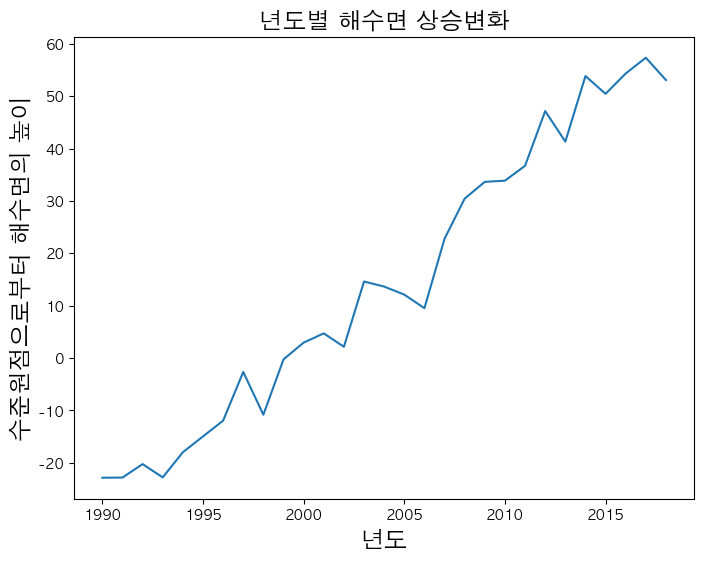

In [121]:
plt.figure(figsize=(8,6))
plt.plot(data['Year'], data['sealevel'])
plt.title('년도별 해수면 상승변화',size=17)
plt.xlabel('년도',size=17)
plt.ylabel('수준원점으로부터 해수면의 높이',size=17)
plt.show()

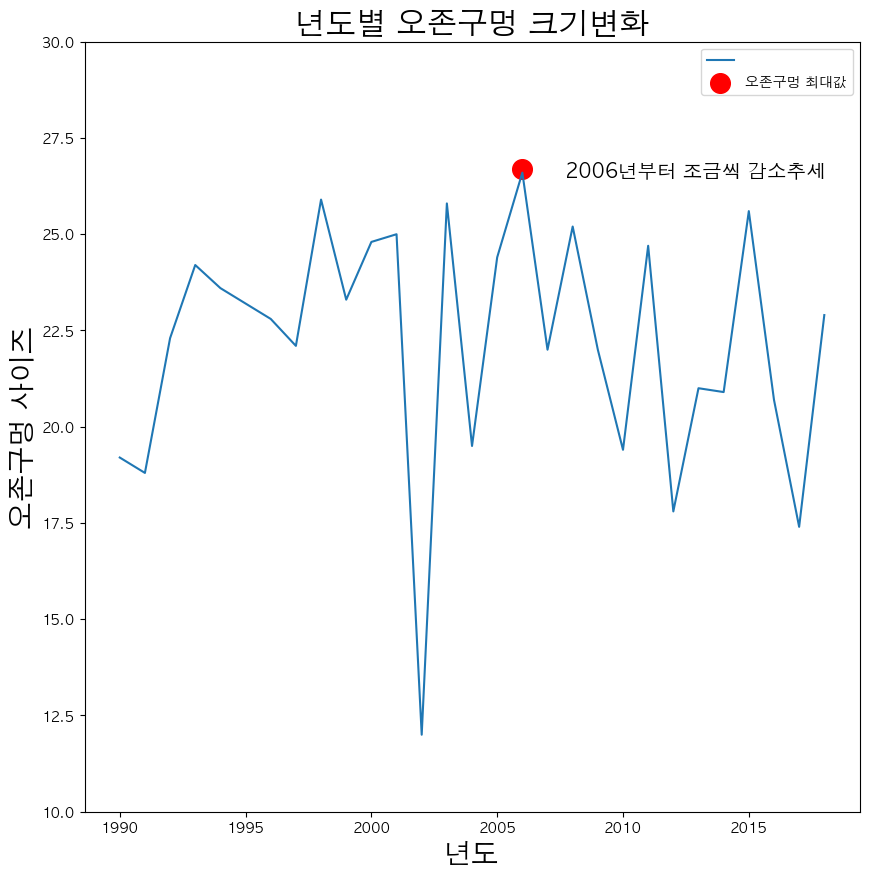

In [118]:
plt.figure(figsize=(10,10))
plt.plot(data['Year'], data['Hole Area'])
plt.title('년도별 오존구멍 크기변화',size=22)
plt.xlabel('년도',size=20)
plt.ylabel('오존구멍 사이즈',size=20)
plt.ylim(10,30)
plt.scatter(2006, 26.7, color='red',s=200)
plt.legend(labels=['','오존구멍 최대값'])
plt.annotate("2006년부터 조금씩 감소추세", xy=(2007.7, 26.5), rotation=0, va='baseline',  fontsize =14)
plt.show()



In [134]:
data2 = data.copy()

In [148]:
plt.style.use("ggplot")

data2.plot(   
    x=data['Year'],
    y=data['co2'],
    kind='bar',
    figsize=(20,20),
    width=0.6,
    color = 'skyblue',
)

plt.figure(figsize=(10,10))


KeyError: "None of [Index([1990, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002,\n       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,\n       2015, 2016, 2017, 2018],\n      dtype='int64')] are in the [columns]"